### 1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.
    
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_data = pd.read_csv(r"D:\Assignments\Logistic Regression\Titanic_test.csv")
train_data = pd.read_csv(r"D:\Assignments\Logistic Regression\Titanic_train.csv")
print(train_data)
print(test_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [15]:
#inspect the data set
print("Train Data Info: ")
print(train_data.info())

print("Train Data Statistics: ")
print(train_data.describe())


Train Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Train Data Statistics: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118   

In [16]:
#checking for missing values

print("Missing Values Of Train Data: ")
print(train_data.isnull().sum())

Missing Values Of Train Data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


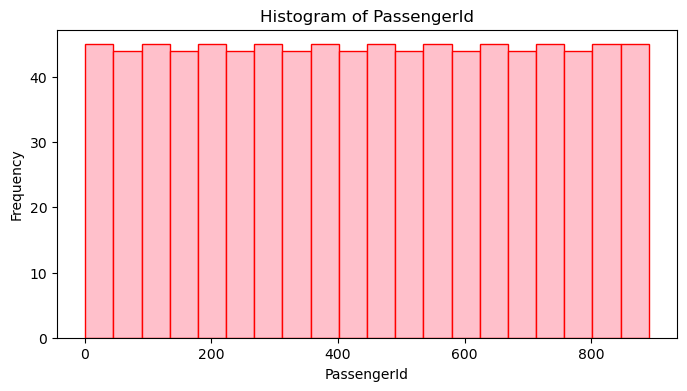

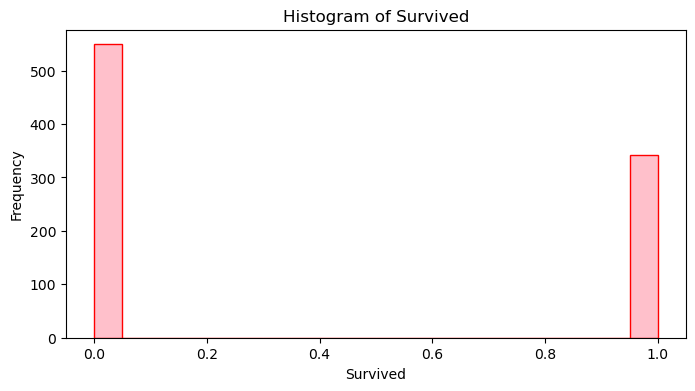

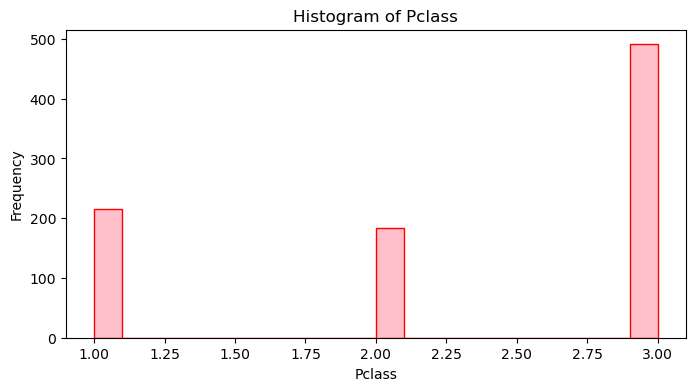

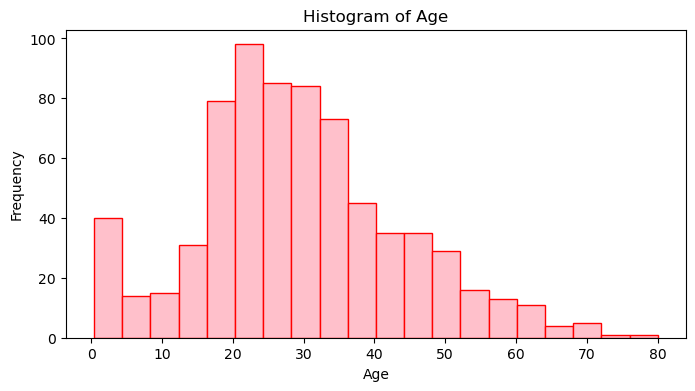

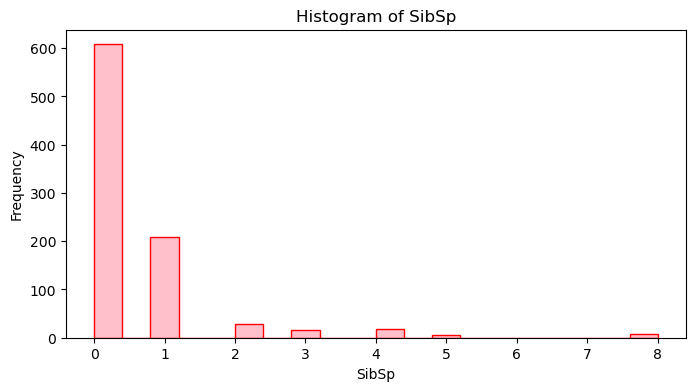

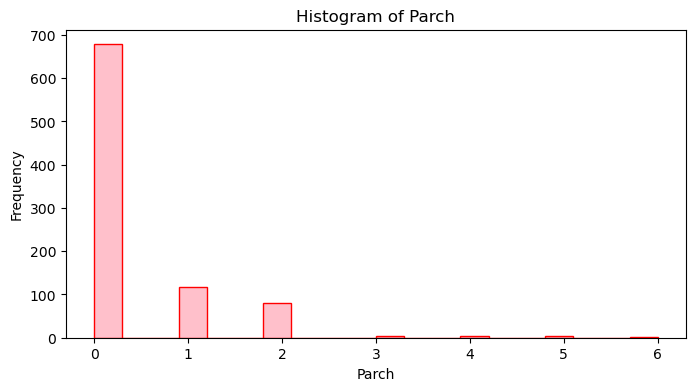

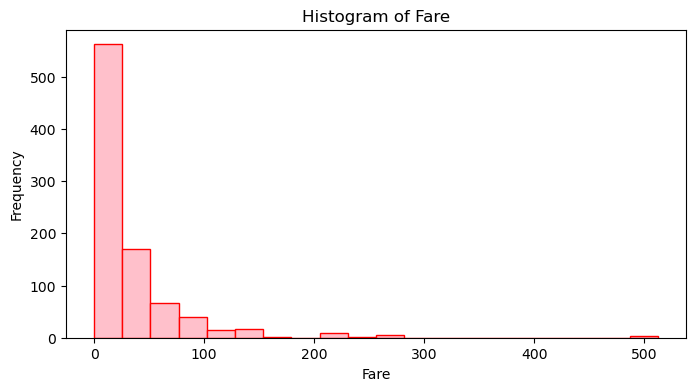

In [17]:
#visualisation for numerical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(include=['int64','float64'])
numerical_columns
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    plt.hist(train_data[col].dropna(), bins=20, color='pink', edgecolor='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    

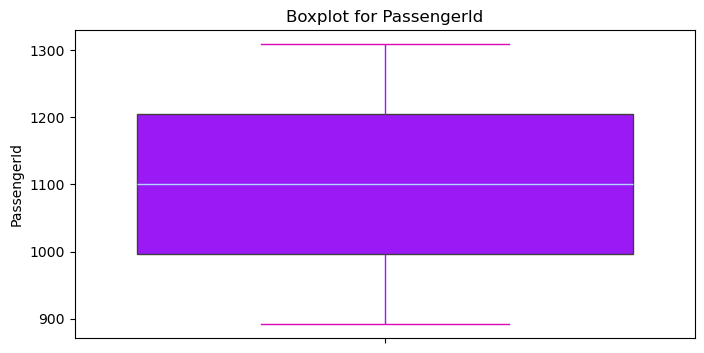

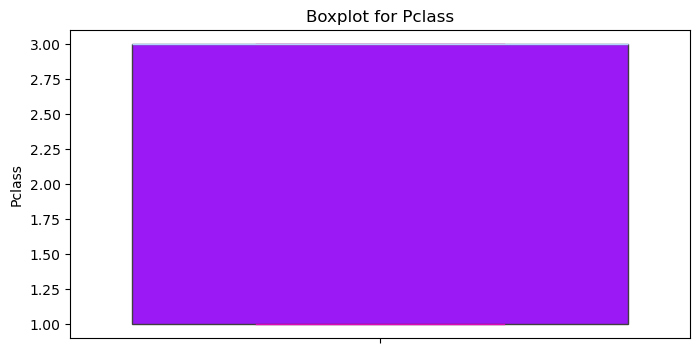

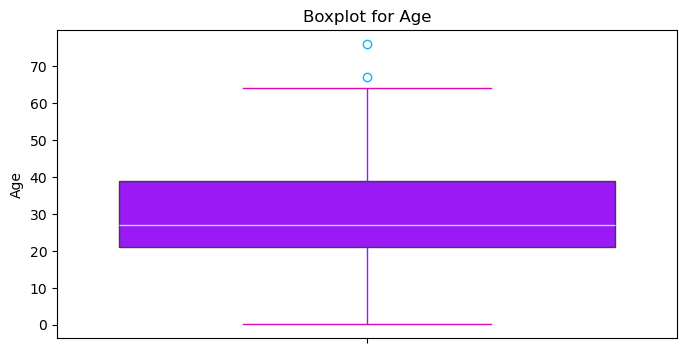

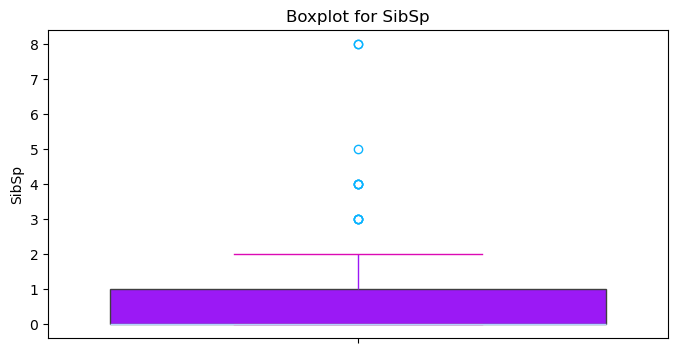

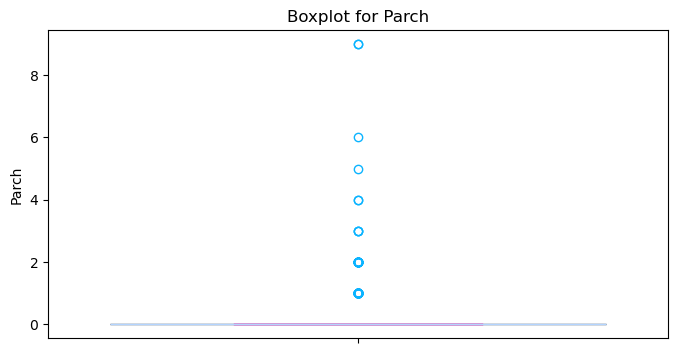

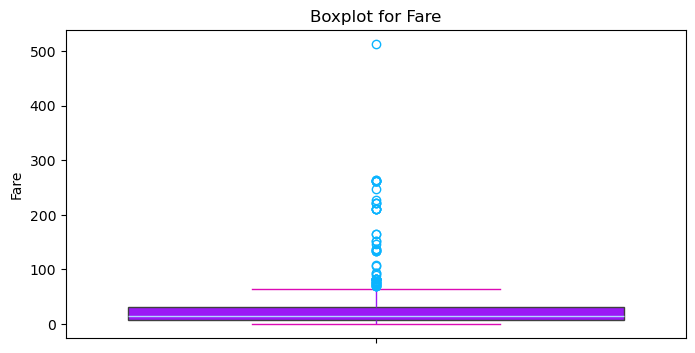

In [38]:
#boxplot for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=col, data = train_data, boxprops=dict(facecolor='#9b19f5'), capprops=dict(color='#dc0ab4'),
                whiskerprops=dict(color='#9b19f5'),medianprops=dict(color='#b3d4ff'), flierprops=dict(color='#0bb4ff',markeredgecolor='#0bb4ff'))
    plt.title(f'Boxplot for {col}')
    plt.show()
    

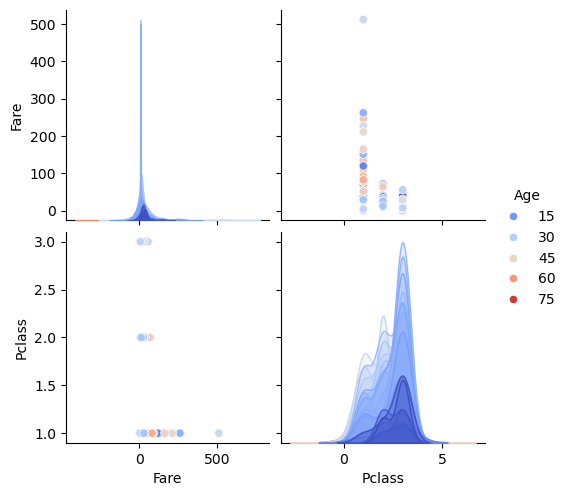

In [18]:
# Step 5: Examine relationships using pair plots
sns.pairplot(train_data[['Age', 'Fare', 'Pclass']].dropna(), hue='Age', palette='coolwarm')
plt.show()

## 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).

b. Encode categorical variables.


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [25]:
# Copy datasets for processing
train_processed = train_data.copy()
test_processed = test_data.copy()

# Handle missing values:
# 1. Impute 'Age' using the median
age_imputer = SimpleImputer(strategy='median')
train_processed['Age'] = age_imputer.fit_transform(train_processed[['Age']]).ravel()
test_processed['Age'] = age_imputer.transform(test_processed[['Age']]).ravel()

# 2. Impute 'Fare' using the median (test dataset only)
fare_imputer = SimpleImputer(strategy='median')
test_processed['Fare'] = fare_imputer.fit_transform(test_processed[['Fare']]).ravel()

# 3. Impute 'Embarked' using the most frequent value (mode)
embarked_imputer = SimpleImputer(strategy='most_frequent')
train_processed['Embarked'] = embarked_imputer.fit_transform(train_processed[['Embarked']]).ravel()

# 4. Drop the 'Cabin' column due to excessive missing data
train_processed.drop(columns=['Cabin'], inplace=True)
test_processed.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables:
# Columns to encode: 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_processed[col] = label_encoder.fit_transform(train_processed[col])
    test_processed[col] = label_encoder.transform(test_processed[col])

# Save the processed datasets (optional)
train_processed.to_csv('Titanic_train_processed.csv', index=False)
test_processed.to_csv('Titanic_test_processed.csv', index=False)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
print(train_processed.isnull().sum())
print(test_processed.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### 3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Define features (X) and target (y)
X = train_processed.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_processed['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = logistic_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_output)

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC Score: 1.00


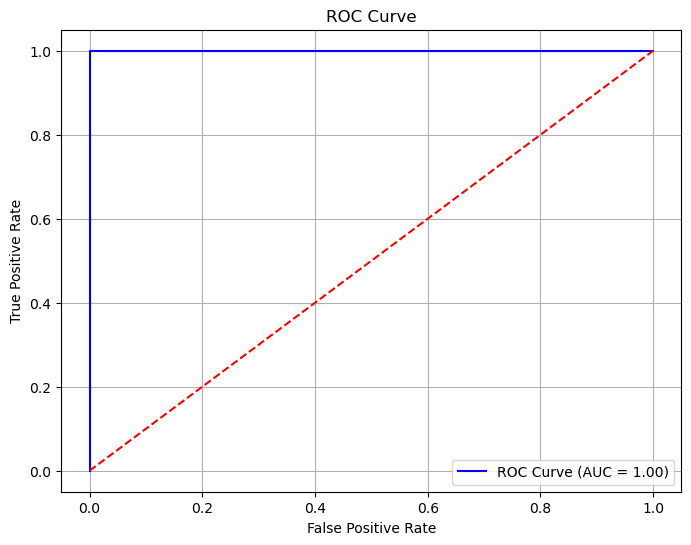

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Prepare the test dataset for prediction
X_test = test_processed.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Predict probabilities for the positive class (Survived = 1)
y_test_proba = logistic_model.predict_proba(X_test)[:, 1]

# Predict class labels for the test set
y_test_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_pred, y_test_pred)  # Placeholder as ground truth is not provided
precision = precision_score(y_test_pred, y_test_pred)
recall = recall_score(y_test_pred, y_test_pred)
f1 = f1_score(y_test_pred, y_test_pred)
roc_auc = roc_auc_score(y_test_pred, y_test_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_pred, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [31]:
import numpy as np

# Retrieve the feature names and corresponding coefficients
feature_names = X_train.columns
coefficients = logistic_model.coef_[0]  # Coefficients for the logistic regression model

# Create a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the exponential of the coefficients (odds ratios)
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])

# Sort by the absolute value of the coefficients to see the most influential features
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the coefficients and their odds ratios
print(coef_df)

# Interpretation tips:
# Positive coefficients increase the probability of survival.
# Negative coefficients decrease the probability of survival.


    Feature  Coefficient  Odds Ratio
5      Fare     0.002534    1.002537
2       Age    -0.030433    0.970025
4     Parch    -0.111850    0.894179
6  Embarked    -0.218778    0.803500
3     SibSp    -0.293906    0.745346
0    Pclass    -0.930679    0.394286
1       Sex    -2.596996    0.074497


In [32]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable


In [33]:
import joblib

# Save the model
joblib.dump(logistic_model, 'logistic_model.pkl')


['logistic_model.pkl']

In [ ]:
## Interview Questions:

### 1. What is the difference between precision and recall?

Precision and recall are performance metrics often used in classification problems, especially in imbalanced datasets.

#### Precision:
It measures the accuracy of positive predictions.
Precision is the ratio of correctly predicted positive instances to the total predicted positive instances.

Precision   =           True Positives (TP)
                   _________________________________
                 True Positives (TP)+False Positives (FP)
​
High precision means fewer false positives.
Example use case:
Spam detection, where you want to avoid marking legitimate emails as spam.


#### Recall (Sensitivity):
It measures the ability of a model to identify all actual positive instances.
Recall is the ratio of correctly predicted positive instances to all actual positive instances.

Recall =         True Positives (TP)
            _______________________________
         True Positives (TP)+False Negatives (FN)

 
High recall means fewer false negatives.
Example use case:
Medical diagnoses, where missing a positive case could have serious consequences.
    
#### Key Difference:

Precision focuses on the quality of positive predictions.
Recall focuses on the completeness of capturing all positive cases.

### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a statistical method used to evaluate the performance of a machine learning model.
It involves splitting the dataset into training and testing subsets multiple times to ensure that the model generalizes well to unseen data.

Types of Cross-Validation:
k-Fold Cross-Validation: The dataset is divided into 𝑘 equal parts (folds). The model is trained on 
𝑘
−
1
k−1 folds and tested on the remaining fold. This process is repeated 
𝑘
k times, with each fold being used as a test set once.
Leave-One-Out Cross-Validation (LOOCV): Each data point is used as a test set once, and the rest form the training set.
Stratified k-Fold: Ensures that the proportion of classes (e.g., positive/negative) in each fold is the same as in the original dataset, which is particularly useful in binary classification with imbalanced data.
Why is it important in binary classification?
Reduces Overfitting: Cross-validation helps detect overfitting by testing the model on multiple subsets of data.
Reliable Performance Metrics: It provides a more accurate estimate of model performance by averaging results across all folds.
Handles Class Imbalance: Stratified cross-validation ensures that both classes are represented in each fold, avoiding misleading metrics.
Optimizing Model Parameters: It helps in selecting hyperparameters (e.g., regularization strength, learning rate) by evaluating their impact on unseen data.


